## This is our Base model

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
pd.set_option('display.float_format', lambda x: '%.3f' % x)
plt.rcParams["figure.figsize"] = (10,6)

In [5]:
df_0 = pd.read_csv("KDDTest+.txt")
df= df_0.copy()
df.head()

,0,tcp,private,REJ,0.1,0.2,0.3,0.4,0.5,0.6,...,0.04.1,0.06.1,0.00.3,0.00.4,0.00.5,0.00.6,1.00.2,1.00.3,neptune,21
0,0,tcp,private,REJ,0,0,0,0,0,0,...,0.000,0.060,0.000,0.000,0.000,0.000,1.000,1.000,neptune,21
1,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,0.610,0.040,0.610,0.020,0.000,0.000,0.000,0.000,normal,21
2,0,icmp,eco_i,SF,20,0,0,0,0,0,...,1.000,0.000,1.000,0.280,0.000,0.000,0.000,0.000,saint,15
3,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,0.310,0.170,0.030,0.020,0.000,0.000,0.830,0.710,mscan,11
4,0,tcp,http,SF,267,14515,0,0,0,0,...,1.000,0.000,0.010,0.030,0.010,0.000,0.000,0.000,normal,21


In [6]:
columns = (['duration'
,'protocol_type'
,'service'
,'flag'
,'src_bytes'
,'dst_bytes'
,'land'
,'wrong_fragment'
,'urgent'
,'hot'
,'num_failed_logins'
,'logged_in'
,'num_compromised'
,'root_shell'
,'su_attempted'
,'num_root'
,'num_file_creations'
,'num_shells'
,'num_access_files'
,'num_outbound_cmds'
,'is_host_login'
,'is_guest_login'
,'count'
,'srv_count'
,'serror_rate'
,'srv_serror_rate'
,'rerror_rate'
,'srv_rerror_rate'
,'same_srv_rate'
,'diff_srv_rate'
,'srv_diff_host_rate'
,'dst_host_count'
,'dst_host_srv_count'
,'dst_host_same_srv_rate'
,'dst_host_diff_srv_rate'
,'dst_host_same_src_port_rate'
,'dst_host_srv_diff_host_rate'
,'dst_host_serror_rate'
,'dst_host_srv_serror_rate'
,'dst_host_rerror_rate'
,'dst_host_srv_rerror_rate'
,'attack'
,'level'])

df.columns = columns

In [7]:
df.head(5)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,level
0,0,tcp,private,REJ,0,0,0,0,0,0,...,0.000,0.060,0.000,0.000,0.000,0.000,1.000,1.000,neptune,21
1,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,0.610,0.040,0.610,0.020,0.000,0.000,0.000,0.000,normal,21
2,0,icmp,eco_i,SF,20,0,0,0,0,0,...,1.000,0.000,1.000,0.280,0.000,0.000,0.000,0.000,saint,15
3,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,0.310,0.170,0.030,0.020,0.000,0.000,0.830,0.710,mscan,11
4,0,tcp,http,SF,267,14515,0,0,0,0,...,1.000,0.000,0.010,0.030,0.010,0.000,0.000,0.000,normal,21


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22543 entries, 0 to 22542
Data columns (total 43 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     22543 non-null  int64  
 1   protocol_type                22543 non-null  object 
 2   service                      22543 non-null  object 
 3   flag                         22543 non-null  object 
 4   src_bytes                    22543 non-null  int64  
 5   dst_bytes                    22543 non-null  int64  
 6   land                         22543 non-null  int64  
 7   wrong_fragment               22543 non-null  int64  
 8   urgent                       22543 non-null  int64  
 9   hot                          22543 non-null  int64  
 10  num_failed_logins            22543 non-null  int64  
 11  logged_in                    22543 non-null  int64  
 12  num_compromised              22543 non-null  int64  
 13  root_shell      

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
duration,22543.000,218.869,1407.207,0.000,0.000,0.000,0.000,57715.000
src_bytes,22543.000,10395.911,472796.913,0.000,0.000,54.000,287.000,62825648.000
dst_bytes,22543.000,2056.110,21219.764,0.000,0.000,46.000,601.000,1345927.000
land,22543.000,0.000,0.018,0.000,0.000,0.000,0.000,1.000
wrong_fragment,22543.000,0.008,0.143,0.000,0.000,0.000,0.000,3.000
urgent,22543.000,0.001,0.036,0.000,0.000,0.000,0.000,3.000
hot,22543.000,0.105,0.928,0.000,0.000,0.000,0.000,101.000
num_failed_logins,22543.000,0.022,0.150,0.000,0.000,0.000,0.000,4.000
logged_in,22543.000,0.442,0.497,0.000,0.000,0.000,1.000,1.000
num_compromised,22543.000,0.120,7.270,0.000,0.000,0.000,0.000,796.000


In [10]:
df.isnull().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

In [11]:
#helper function for deeper analysis
def unique_values(df, columns):
    """Prints unique values and their counts for specific columns in the DataFrame."""

    for column_name in columns:
        print(f"Column: {column_name}\n{'-'*30}")
        unique_vals = df[column_name].unique()
        value_counts = df[column_name].value_counts()
        print(f"Unique Values ({len(unique_vals)}): {unique_vals}\n")
        print(f"Value Counts:\n{value_counts}\n{'='*40}\n")

In [12]:
cat_features = df.select_dtypes(include='object').columns
unique_values(df, cat_features)

Column: protocol_type
------------------------------
Unique Values (3): ['tcp' 'icmp' 'udp']

Value Counts:
protocol_type
tcp     18879
udp      2621
icmp     1043
Name: count, dtype: int64

Column: service
------------------------------
Unique Values (64): ['private' 'ftp_data' 'eco_i' 'telnet' 'http' 'smtp' 'ftp' 'ldap' 'pop_3'
 'courier' 'discard' 'ecr_i' 'imap4' 'domain_u' 'mtp' 'systat' 'iso_tsap'
 'other' 'csnet_ns' 'finger' 'uucp' 'whois' 'netbios_ns' 'link' 'Z39_50'
 'sunrpc' 'auth' 'netbios_dgm' 'uucp_path' 'vmnet' 'domain' 'name' 'pop_2'
 'http_443' 'urp_i' 'login' 'gopher' 'exec' 'time' 'remote_job' 'ssh'
 'kshell' 'sql_net' 'shell' 'hostnames' 'echo' 'daytime' 'pm_dump' 'IRC'
 'netstat' 'ctf' 'nntp' 'netbios_ssn' 'tim_i' 'supdup' 'bgp' 'nnsp' 'rje'
 'printer' 'efs' 'X11' 'ntp_u' 'klogin' 'tftp_u']

Value Counts:
service
http       7853
private    4773
telnet     1626
pop_3      1019
smtp        934
           ... 
printer      11
ntp_u        10
rje           8
tim_i       

In [13]:
df.duplicated().sum()

0

In [14]:
df.shape

(22543, 43)

<Figure size 2000x4000 with 0 Axes>

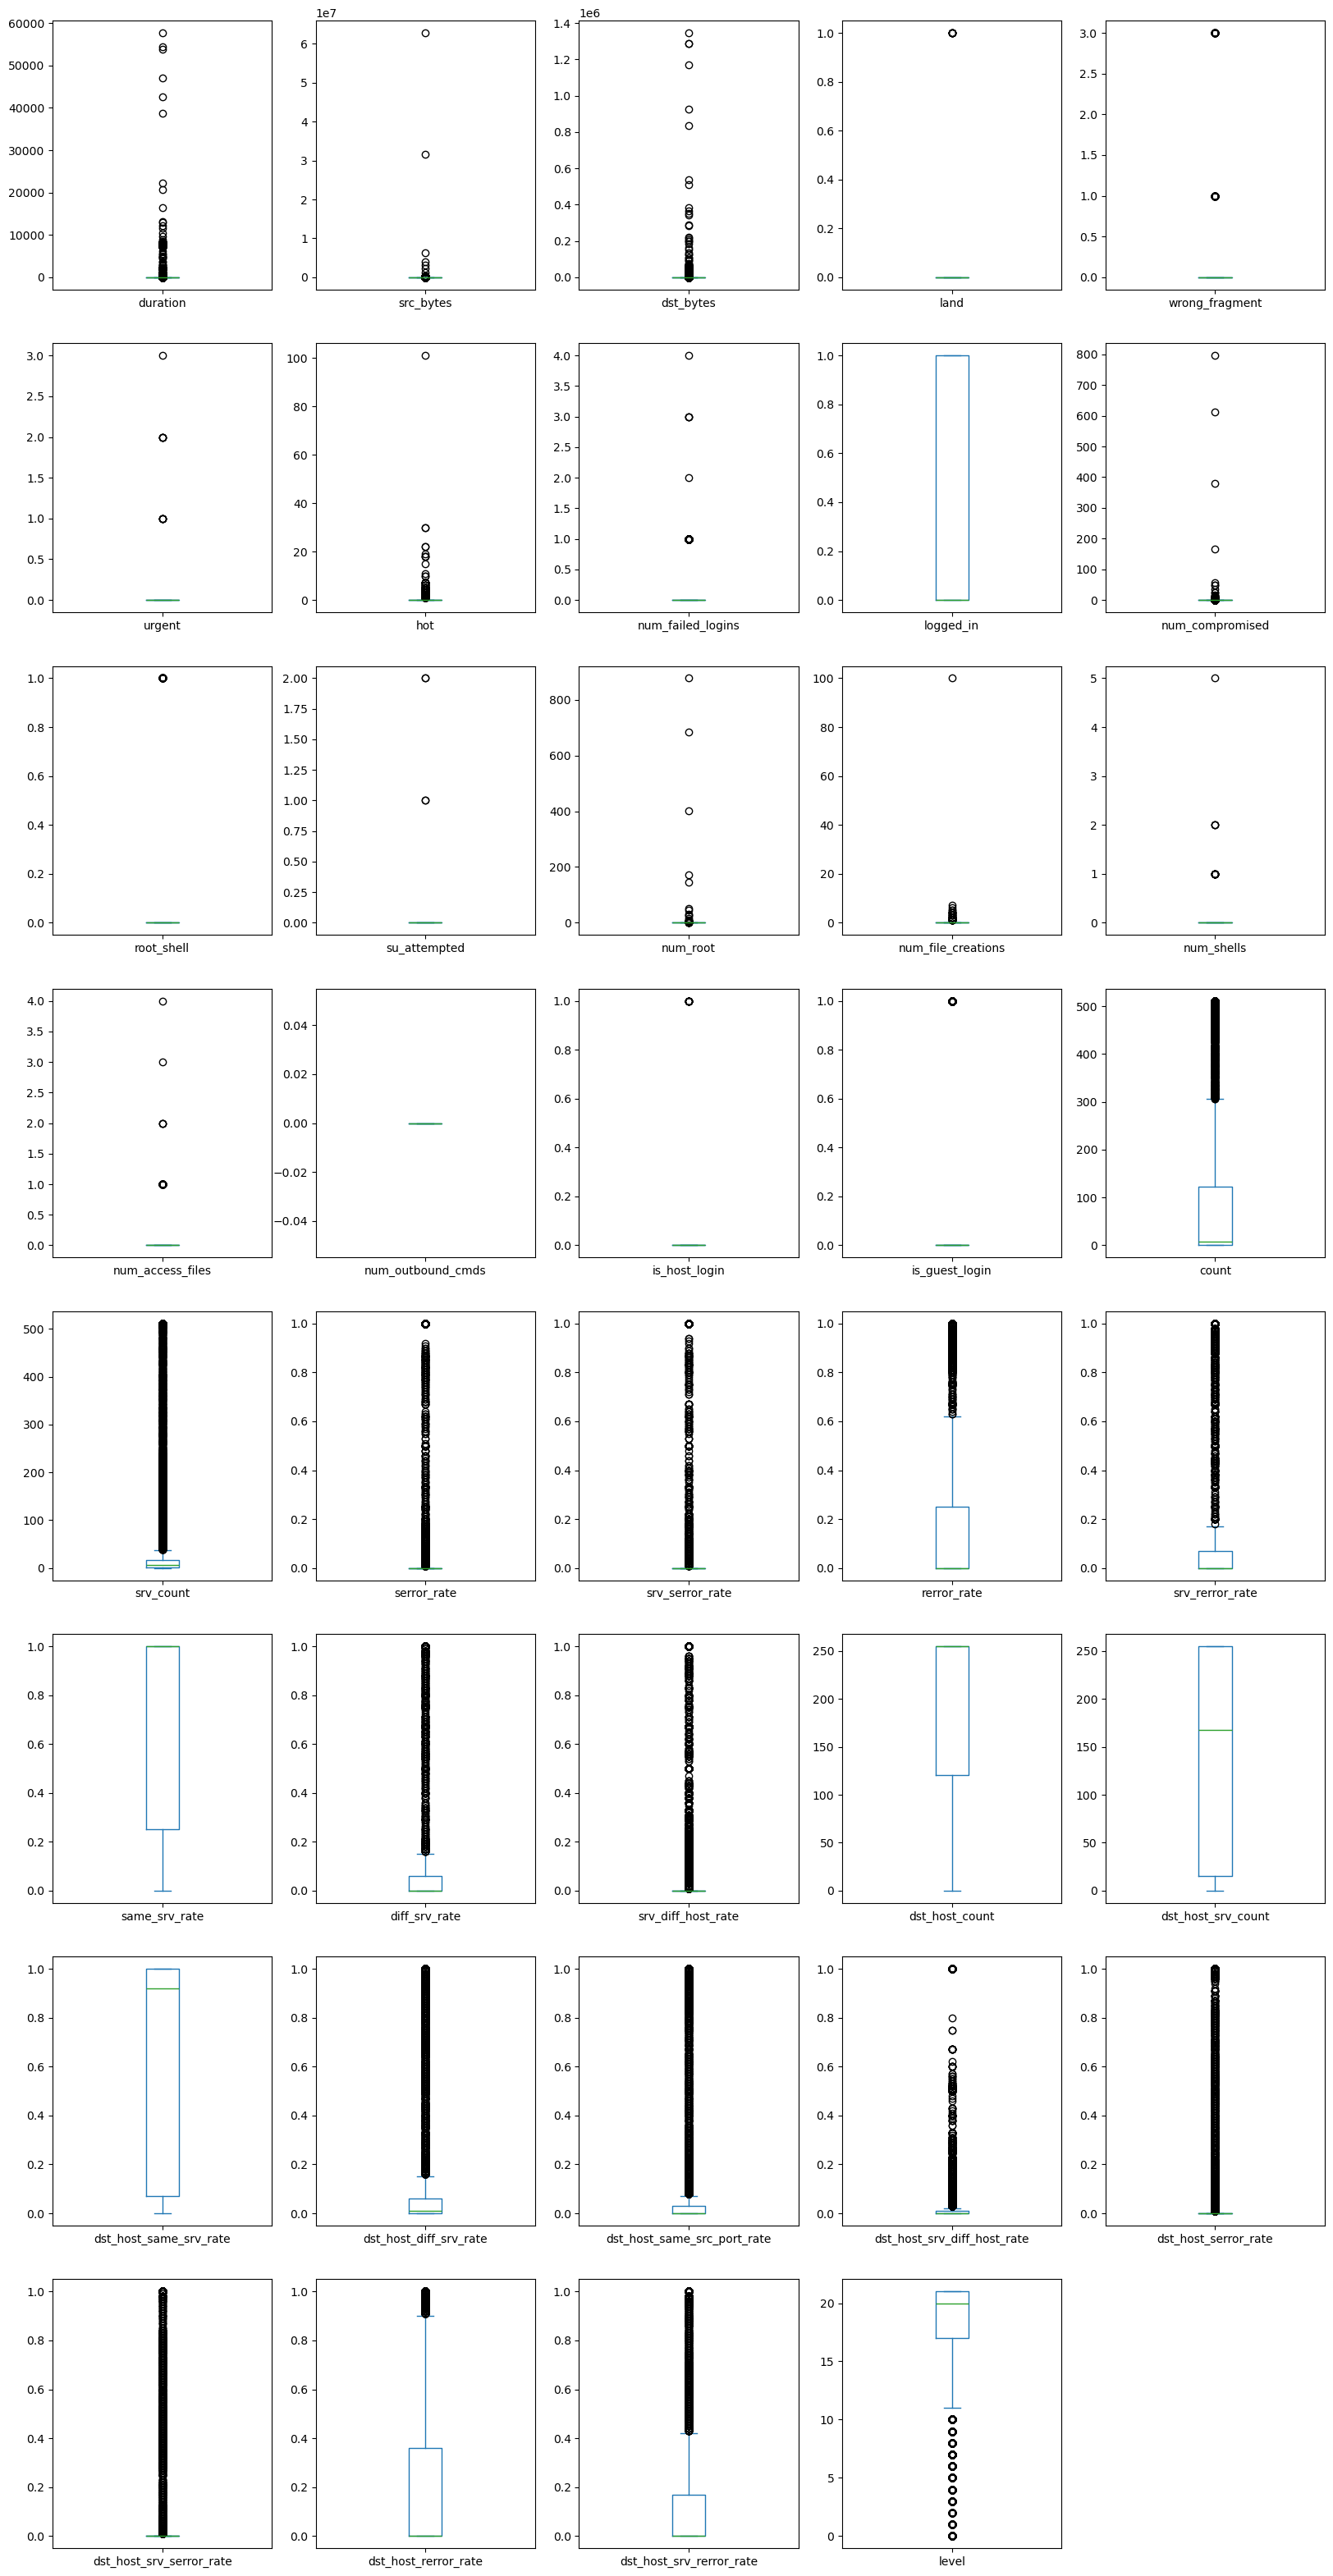

In [15]:
plt.figure(figsize=(20, 40))
df.plot(kind='box', subplots=True, layout=(8, 5), figsize=(20, 40))
plt.show()

In [16]:
attack_n = []
for i in df.attack :
  if i == 'normal':
    attack_n.append("normal")
  else:
    attack_n.append("attack")
df['attack'] = attack_n 

In [17]:
df['attack'].unique()

array(['attack', 'normal'], dtype=object)

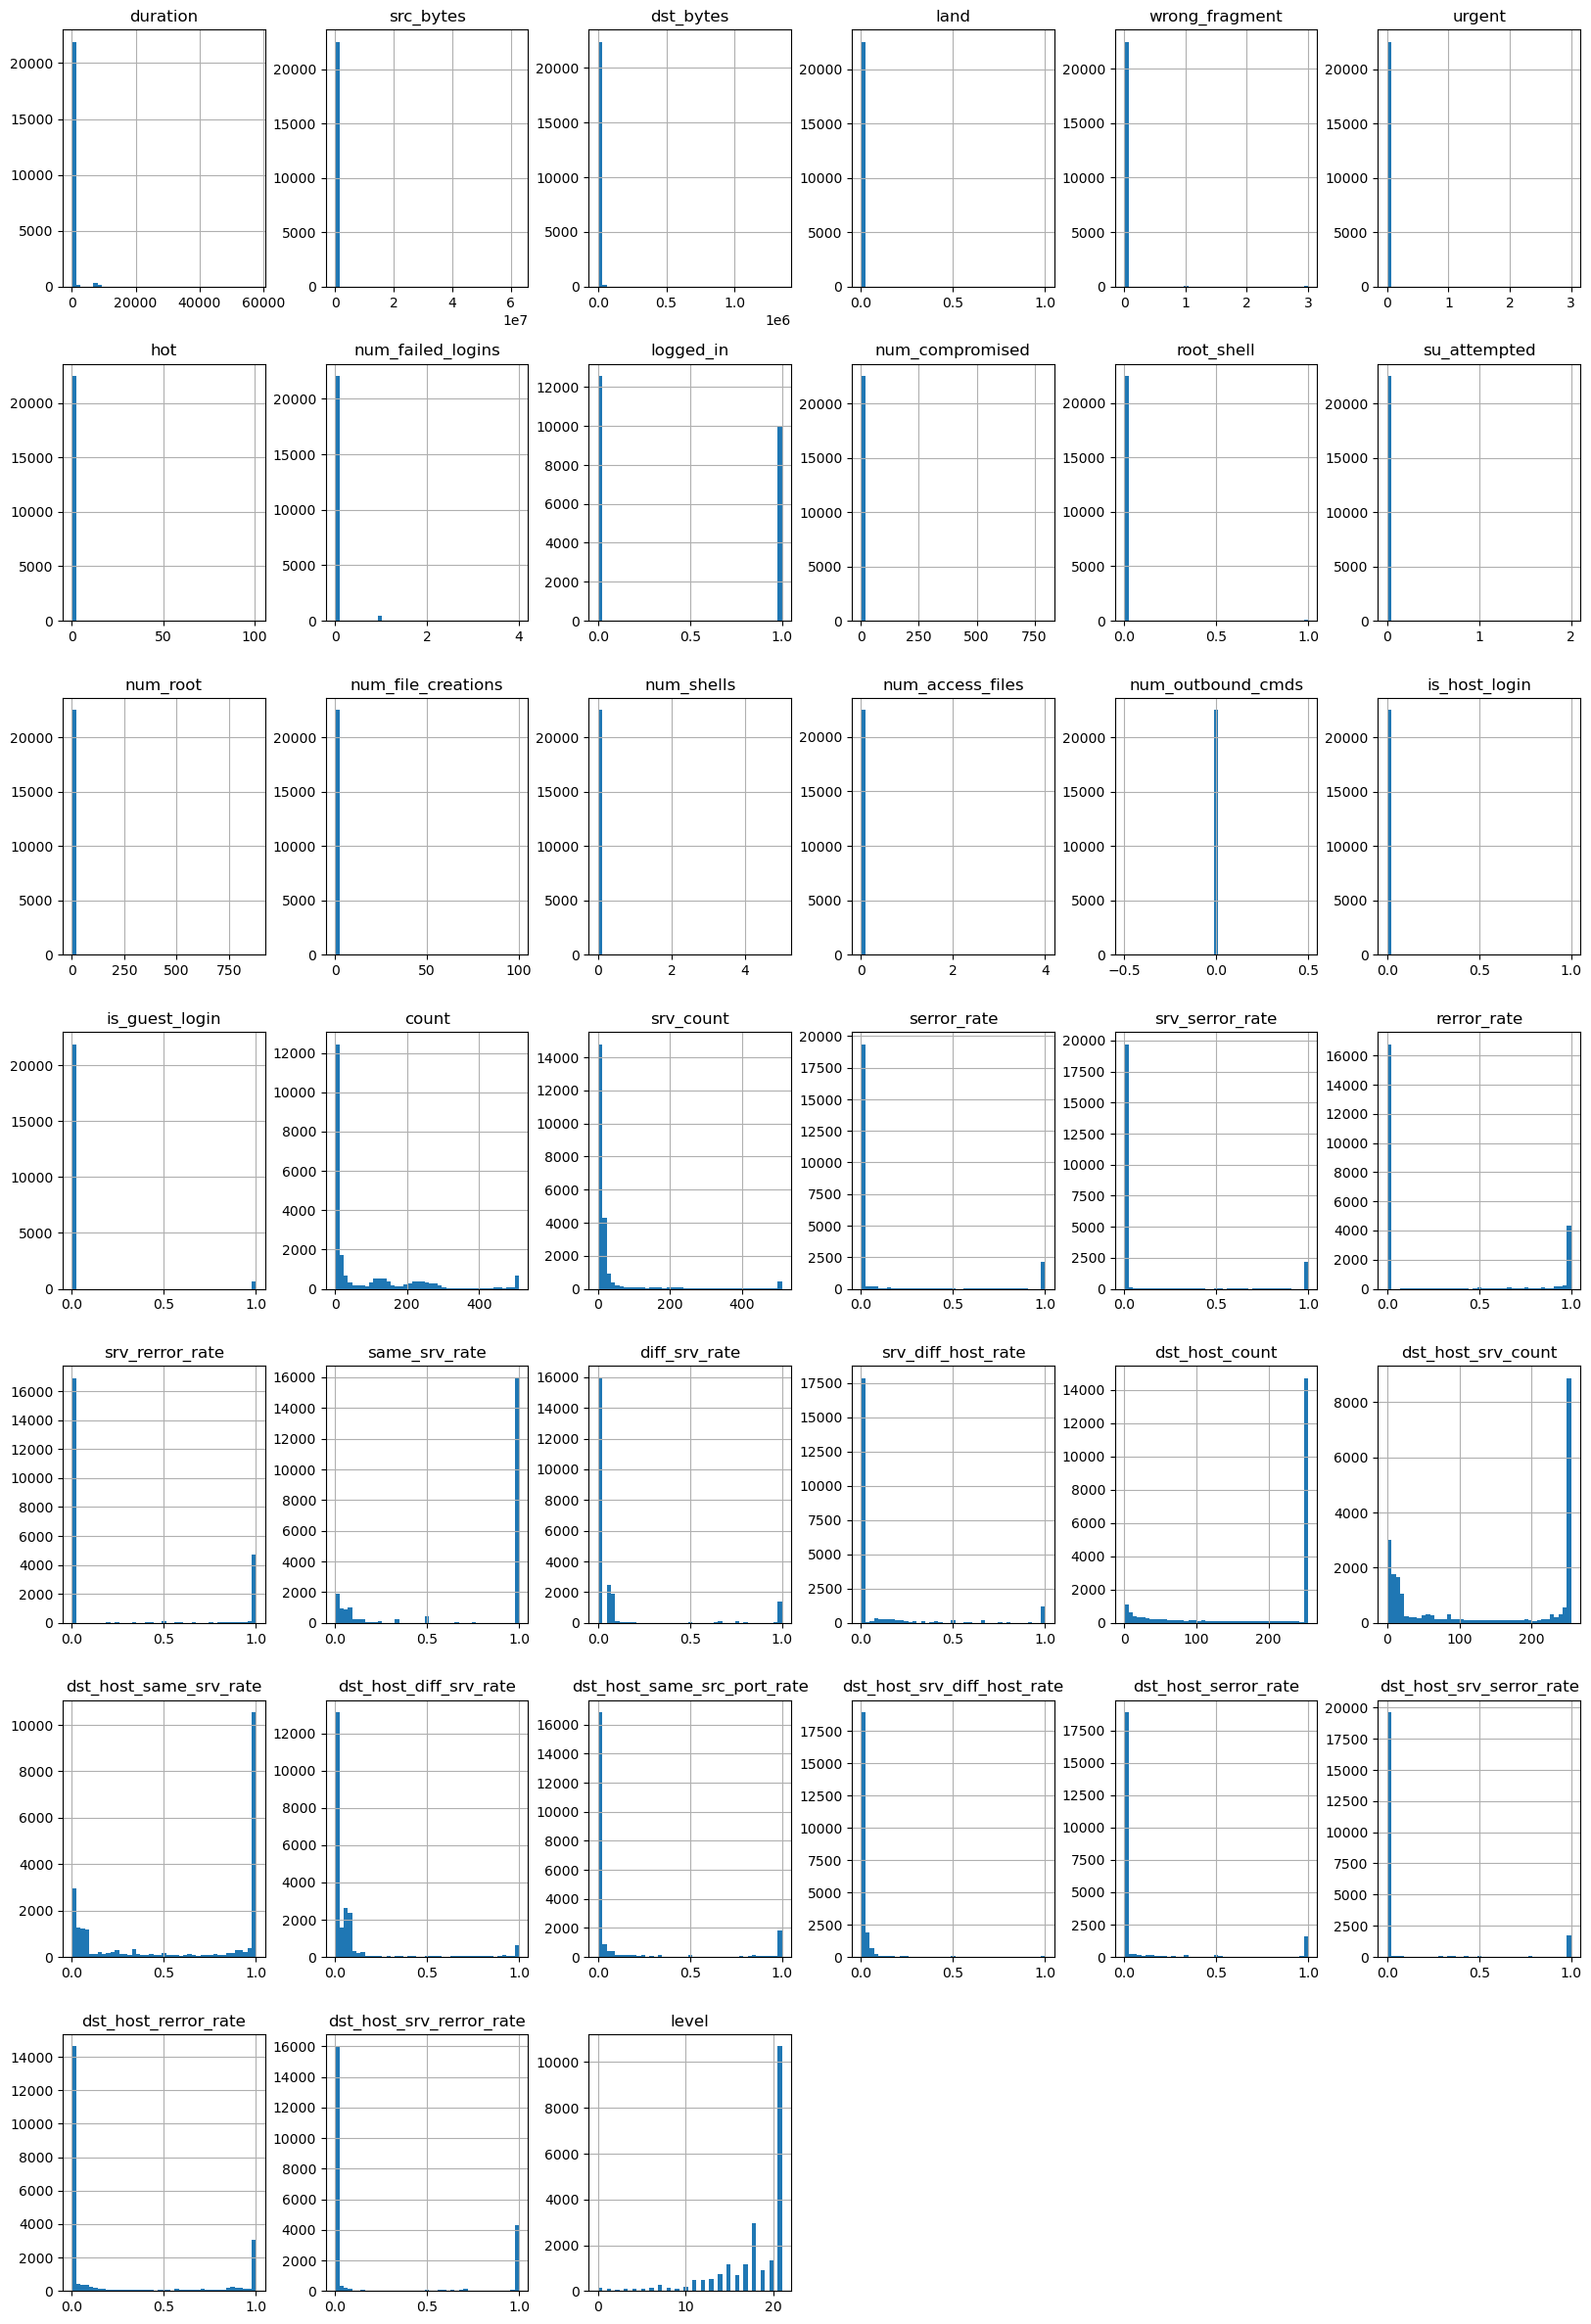

In [18]:
df.hist(bins=43,figsize=(20,30));

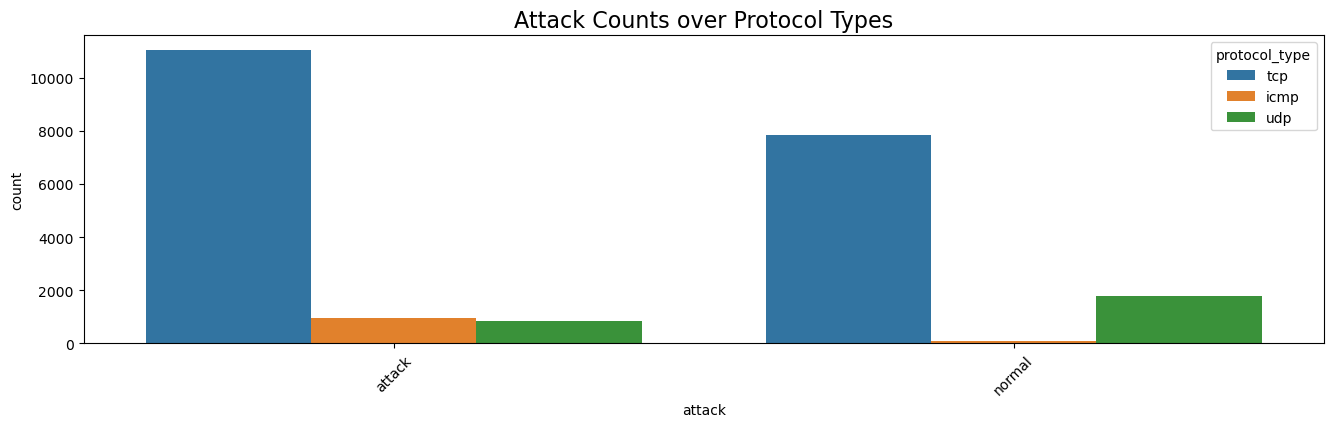

In [19]:
plt.figure(figsize=(16,4))
sns.countplot(x='attack',data=df,hue='protocol_type')
plt.xticks(rotation=45)
plt.title('Attack Counts over Protocol Types',fontdict={'fontsize':16})
plt.show()

In [20]:
# So we can see that most of the attacks are from tcp, then udp, and least attack comes from icmp

In [21]:
df["protocol_type"].value_counts(normalize=True)

protocol_type
tcp    0.837
udp    0.116
icmp   0.046
Name: proportion, dtype: float64

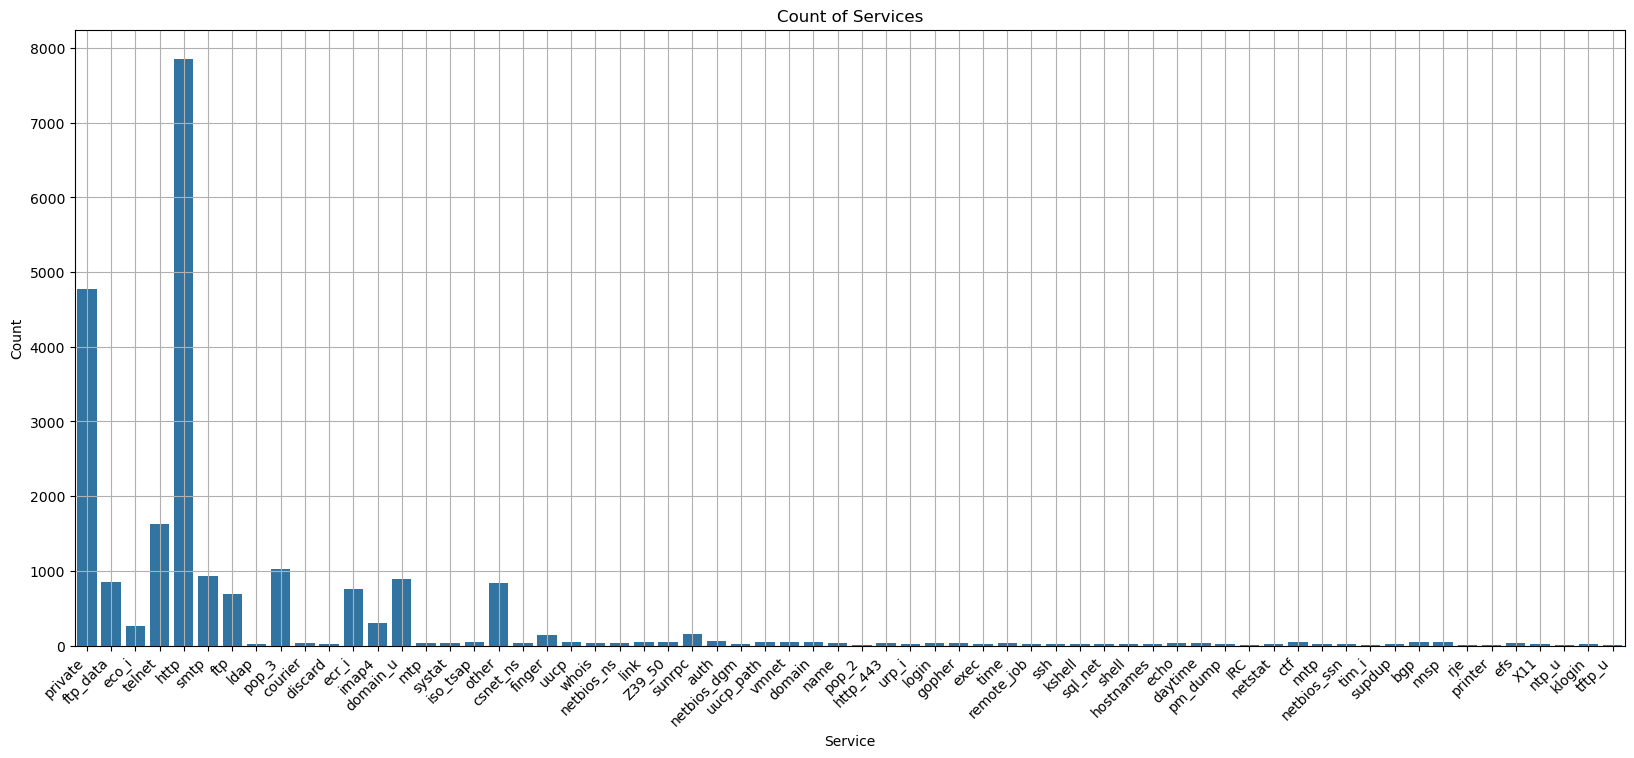

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 8))  # Adjusted figure size
ax = sns.countplot(x='service', data=df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")  # Rotated labels
plt.xlabel('Service')
plt.ylabel('Count')
plt.title('Count of Services')
plt.grid(True)
plt.show()


In [23]:
# Services most used in general follows as, http,private,domain_u,smtp, ftp,other..

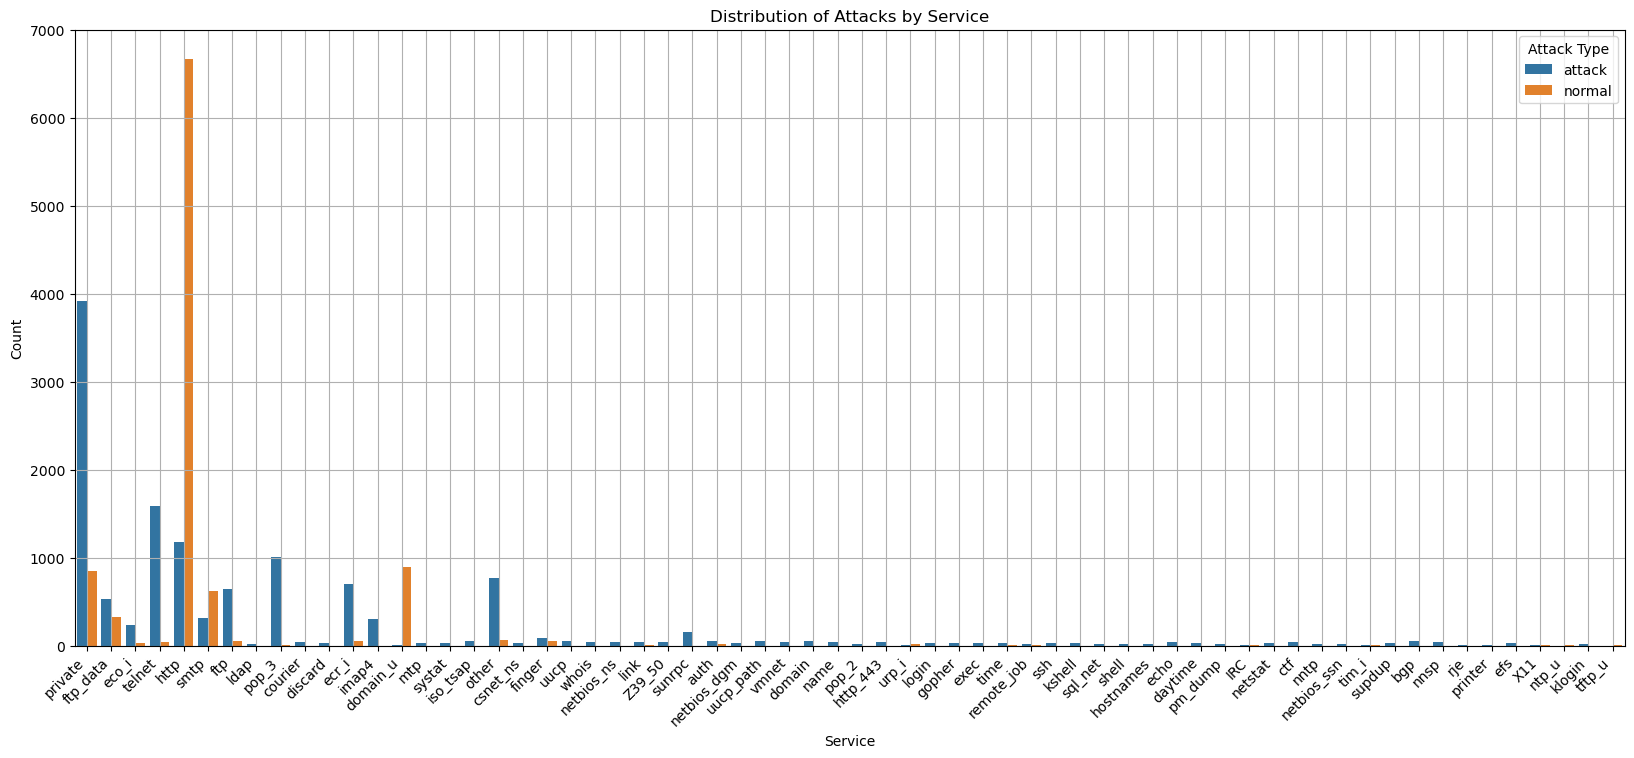

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 8))  # Adjusted figure size
ax = sns.countplot(x='service', hue='attack', data=df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")  # Rotated labels
plt.xlabel('Service')
plt.ylabel('Count')
plt.title('Distribution of Attacks by Service')
plt.legend(title='Attack Type')
plt.grid(True)
plt.show()


In [25]:
#we can see that private attacks is most common service 

<Figure size 1200x800 with 0 Axes>

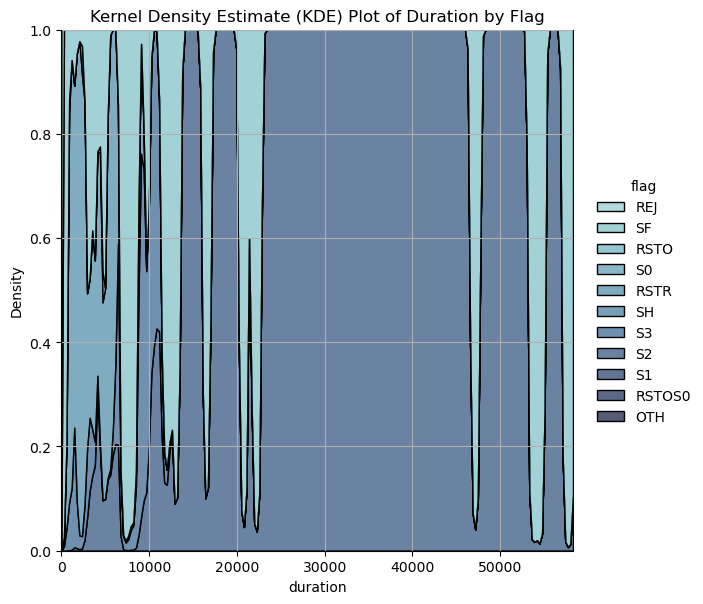

In [26]:

plt.figure(figsize=(12, 8))
sns.displot(
    data=df,
    x="duration",
    hue="flag",
    kind="kde",
    height=6,
    multiple="fill",
    clip=(0, None),
    palette="ch:rot=-.25,hue=1,light=.75",
)
plt.title('Kernel Density Estimate (KDE) Plot of Duration by Flag')
plt.grid(True)
plt.show()


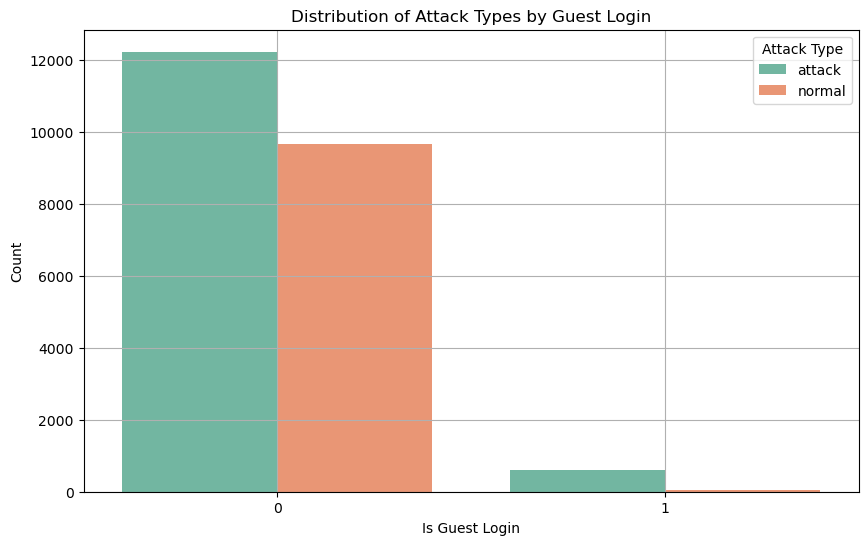

In [27]:
plt.figure(figsize=(10, 6))
sns.countplot(x='is_guest_login', hue='attack', data=df, palette='Set2')
plt.xlabel('Is Guest Login')
plt.ylabel('Count')
plt.title('Distribution of Attack Types by Guest Login')
plt.legend(title='Attack Type')
plt.grid(True)
plt.show()

In [28]:
cat_features = df.select_dtypes(include='object').columns
cat_features

Index(['protocol_type', 'service', 'flag', 'attack'], dtype='object')

In [29]:
from sklearn import preprocessing
le=preprocessing.LabelEncoder()
clm=['protocol_type', 'service', 'flag', 'attack']
for x in clm:
    df[x]=le.fit_transform(df[x])

In [30]:
from sklearn.model_selection import train_test_split

X = df.drop(["attack"], axis=1)
y = df["attack"]

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.1,random_state=43) 

In [31]:
train_index = X_train.columns
train_index

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'level'],
      dtype='object')

In [32]:
from sklearn.feature_selection import mutual_info_classif
mutual_info = mutual_info_classif(X_train, y_train)
mutual_info = pd.Series(mutual_info)
mutual_info.index = train_index
mutual_info.sort_values(ascending=False)

src_bytes                     0.537
dst_bytes                     0.488
service                       0.335
dst_host_srv_count            0.242
flag                          0.237
dst_host_same_srv_rate        0.231
dst_host_diff_srv_rate        0.230
dst_host_rerror_rate          0.215
dst_host_srv_rerror_rate      0.186
level                         0.182
count                         0.180
diff_srv_rate                 0.178
same_srv_rate                 0.176
logged_in                     0.163
rerror_rate                   0.157
srv_rerror_rate               0.155
dst_host_srv_diff_host_rate   0.132
dst_host_same_src_port_rate   0.119
srv_diff_host_rate            0.101
dst_host_serror_rate          0.083
dst_host_count                0.079
dst_host_srv_serror_rate      0.078
serror_rate                   0.078
duration                      0.067
srv_serror_rate               0.063
srv_count                     0.060
hot                           0.019
protocol_type               

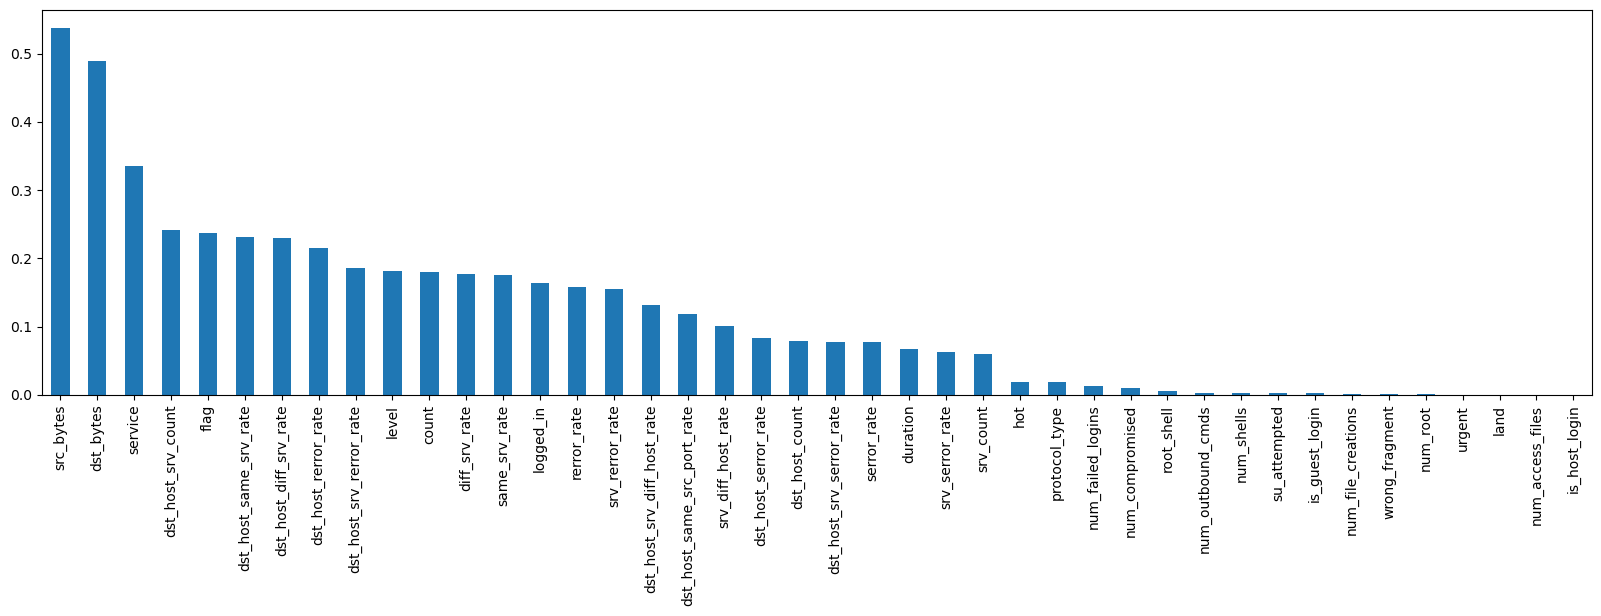

In [33]:
mutual_info.sort_values(ascending=False).plot.bar(figsize=(20, 5));

In [34]:
from sklearn.feature_selection import SelectKBest
Select_features = SelectKBest(mutual_info_classif, k=30)
Select_features.fit(X_train, y_train)
train_index[Select_features.get_support()]

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'hot', 'logged_in', 'num_root', 'is_guest_login', 'count',
       'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate',
       'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate',
       'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count',
       'dst_host_same_srv_rate', 'dst_host_diff_srv_rate',
       'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate',
       'dst_host_serror_rate', 'dst_host_srv_serror_rate',
       'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'level'],
      dtype='object')

In [35]:
columns=['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'wrong_fragment', 'hot', 'logged_in', 'num_compromised',
       'count', 'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate']

#We will continue our model with top 15 features, because dataset is big enough

X_train=X_train[columns]
X_test=X_test[columns]

In [36]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test) # we use only transform in order to prevent data leakage

In [37]:
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier

In [38]:
XGBoost_model = XGBClassifier(random_state = 42)
Logistic_model = LogisticRegression(random_state=42)

In [39]:
XGBoost = XGBoost_model.fit(X_train,y_train)

In [40]:
Logistic = Logistic_model.fit(X_train,y_train)

In [41]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, recall_score, precision_score, f1_score, roc_auc_score

In [42]:
#it's a helper function in order to evaluate our model if it's overfit or underfit.
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

In [43]:
eval_metric(Logistic_model, X_train, y_train, X_test, y_test)

Test_Set
[[1172   80]
 [ 178  825]]
              precision    recall  f1-score   support

           0       0.87      0.94      0.90      1252
           1       0.91      0.82      0.86      1003

    accuracy                           0.89      2255
   macro avg       0.89      0.88      0.88      2255
weighted avg       0.89      0.89      0.88      2255


Train_Set
[[10815   765]
 [ 1415  7293]]
              precision    recall  f1-score   support

           0       0.88      0.93      0.91     11580
           1       0.91      0.84      0.87      8708

    accuracy                           0.89     20288
   macro avg       0.89      0.89      0.89     20288
weighted avg       0.89      0.89      0.89     20288



In [44]:
eval_metric(XGBoost_model, X_train, y_train, X_test, y_test)

Test_Set
[[1231   21]
 [  15  988]]
              precision    recall  f1-score   support

           0       0.99      0.98      0.99      1252
           1       0.98      0.99      0.98      1003

    accuracy                           0.98      2255
   macro avg       0.98      0.98      0.98      2255
weighted avg       0.98      0.98      0.98      2255


Train_Set
[[11510    70]
 [   62  8646]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     11580
           1       0.99      0.99      0.99      8708

    accuracy                           0.99     20288
   macro avg       0.99      0.99      0.99     20288
weighted avg       0.99      0.99      0.99     20288



In [45]:
param_grid = {
    "n_estimators": [50,64,100,128],
    "max_depth": [2, 3, 4,5,6],
    "learning_rate": [0.01,0,0.03, 0.05, 0.1],
    "subsample": [0.5, 0.8],
    "colsample_bytree": [0.5, 0.8]
}

In [46]:
from sklearn.model_selection import GridSearchCV

XGB_model = XGBClassifier(random_state=42) #initialize the model

XGB_grid_model = GridSearchCV(XGB_model,
                        param_grid,
                        scoring="f1",
                        n_jobs=-1,
                        return_train_score=True).fit(X_train, y_train)

In [47]:
XGB_grid_model.best_score_

0.9861203545469277

In [48]:
XGB_grid_model.best_params_

{'colsample_bytree': 0.8,
 'learning_rate': 0.1,
 'max_depth': 6,
 'n_estimators': 128,
 'subsample': 0.8}

In [49]:
XGB_model = XGBClassifier(
    colsample_bytree=0.5,
    learning_rate=0.1,
    max_depth=6,
    n_estimators=128,
    subsample=0.8
)

# Fit the classifier to your data
XGB_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.5, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=128, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [50]:
y_pred = XGB_model.predict(X_test)
y_pred_proba = XGB_model.predict_proba(X_test)

xgb_f1 = f1_score(y_test, y_pred)
xgb_recall = recall_score(y_test, y_pred)
xgb_auc = roc_auc_score(y_test, y_pred_proba[:,1])


In [51]:
xgb_auc

0.9992932544220373

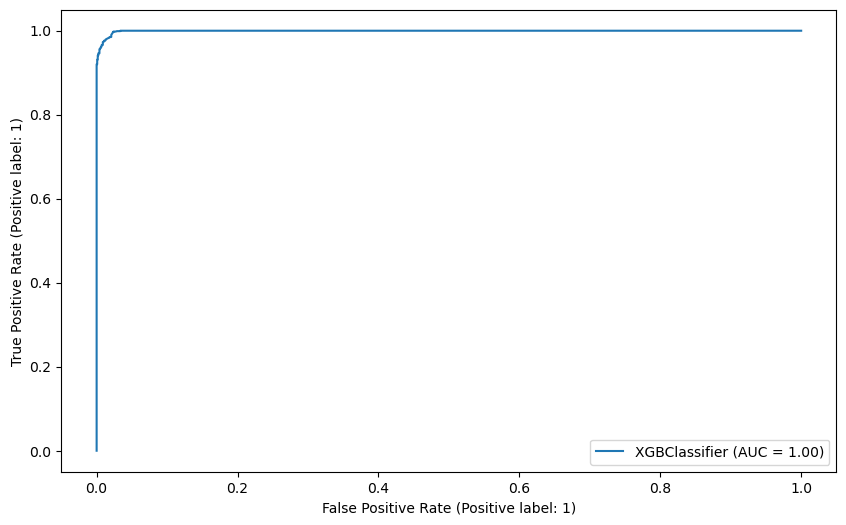

In [52]:
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_estimator(XGB_model, X_test, y_test);

In [53]:
eval_metric(XGB_model, X_train, y_train, X_test, y_test)

Test_Set
[[1228   24]
 [  15  988]]
              precision    recall  f1-score   support

           0       0.99      0.98      0.98      1252
           1       0.98      0.99      0.98      1003

    accuracy                           0.98      2255
   macro avg       0.98      0.98      0.98      2255
weighted avg       0.98      0.98      0.98      2255


Train_Set
[[11476   104]
 [   83  8625]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     11580
           1       0.99      0.99      0.99      8708

    accuracy                           0.99     20288
   macro avg       0.99      0.99      0.99     20288
weighted avg       0.99      0.99      0.99     20288



In [54]:
model = XGB_model
model.feature_importances_

feats = pd.DataFrame(index=X[columns].columns, data= model.feature_importances_, columns=['XGB_importance'])
ada_imp_feats = feats.sort_values("XGB_importance", ascending = False)
ada_imp_feats

,XGB_importance
logged_in,0.192
src_bytes,0.141
protocol_type,0.115
flag,0.110
dst_bytes,0.072
hot,0.063
service,0.051
num_compromised,0.045
rerror_rate,0.040
srv_count,0.040


In [55]:
y_pred

array([0, 0, 1, ..., 0, 1, 0])

In [56]:
y_pred_string = le.inverse_transform(y_pred)
y_pred_string

array(['attack', 'attack', 'normal', ..., 'attack', 'normal', 'attack'],
      dtype=object)

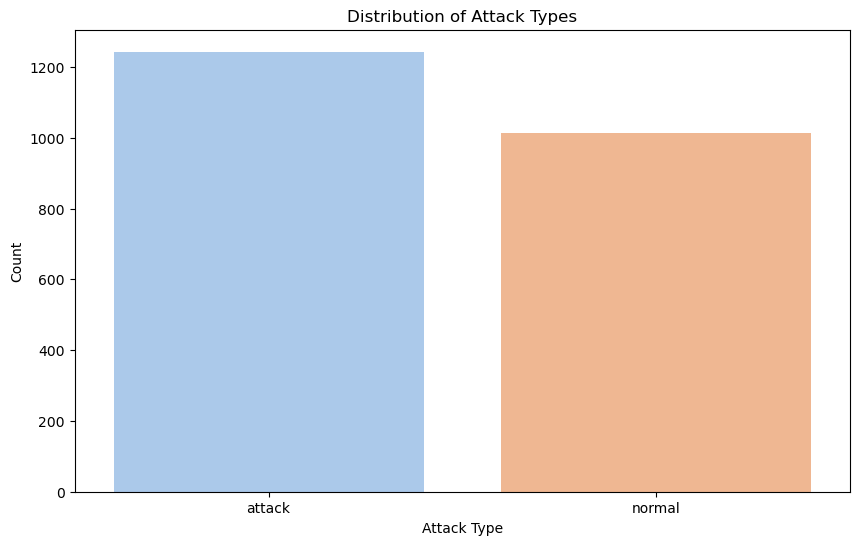

In [57]:
# Create the countplot
plt.figure(figsize=(10, 6))
sns.countplot(x=y_pred_string, palette="pastel")

# Add labels and title
plt.xlabel("Attack Type")
plt.ylabel("Count")
plt.title("Distribution of Attack Types")

# Show the plot
plt.show()